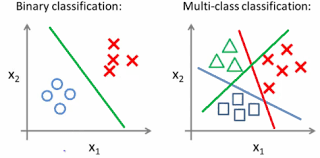

![](https://image.slidesharecdn.com/multinomialclassificationapplicationofml-170117162000/95/multinomial-classification-and-application-of-ml-14-638.jpg?cb=1484670145)

![](https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg)

![](https://miro.medium.com/max/1944/1*70OE3A8sQn4Yl3VPTmChkA.png)

In [31]:
import tensorflow as tf
x_data=[[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],[1,6,6,6,],[1,7,7,7]]
y_data=[[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]
#one hot encoding 방식으로 예측값 표현

X = tf.placeholder("float",[None,4])
Y = tf.placeholder("float",[None,3])
# None : 데이터의 갯수 무한
# 4,3 : 데이터 안에 있는 값의 갯수
nb_classes = 3
# 클레스의 갯수

W = tf.Variable(tf.random_normal([4,nb_classes]),name='weight')
# 4 들어오는 값 nb_calsses 나가는 값
b = tf.Variable(tf.random_normal([nb_classes]),name='bias')

In [32]:
#tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits),dim)
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

In [33]:
#Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [34]:
#Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer,feed_dict={X:x_data,Y:y_data})
        if step % 200 ==0:
            print(step , sess.run(cost,feed_dict={X:x_data,Y:y_data}))

0 5.1804757
200 0.6057537
400 0.47771463
600 0.39540577
800 0.323664
1000 0.25277492
1200 0.22168374
1400 0.20200792
1600 0.18544425
1800 0.17130774
2000 0.15910688


# softmax_cross_entropy_with _logits
    logits = tf.matmul(X,W)+b
    hypothesis = tf.nn.softmax(logits)
> cost = tf.reduce_mean(-tf.rdeuce_sum(Y*tf.log(hypothesis),axis=1))


> cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y_one_hot)   
> cost = tf.reduce_mean(cost_i)

# Animal classification
## with softmax_cross_entropy_with_logits

In [39]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=16, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_one_hot, epochs=1000)

# Single data test
test_data = np.array([[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]) # expected prediction == 3 (feathers)
print(tf.model.predict(test_data), tf.model.predict_classes(test_data))

# Full x_data test
pred = tf.model.predict_classes(x_data)
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

01 [==============================] - 0s 41us/step - loss: 0.0343 - acc: 1.0000
Epoch 835/1000
101/101 [==============================] - 0s 59us/step - loss: 0.0342 - acc: 1.0000
Epoch 836/1000
101/101 [==============================] - 0s 39us/step - loss: 0.0342 - acc: 1.0000
Epoch 837/1000
101/101 [==============================] - 0s 40us/step - loss: 0.0341 - acc: 1.0000
Epoch 838/1000
101/101 [==============================] - 0s 69us/step - loss: 0.0342 - acc: 1.0000
Epoch 839/1000
101/101 [==============================] - 0s 49us/step - loss: 0.0341 - acc: 1.0000
Epoch 840/1000
101/101 [==============================] - 0s 40us/step - loss: 0.0341 - acc: 1.0000
Epoch 841/1000
101/101 [==============================] - 0s 52us/step - loss: 0.0341 - acc: 1.0000
Epoch 842/1000
101/101 [==============================] - 0s 39us/step - loss: 0.0339 - acc: 1.0000
Epoch 843/1000
101/101 [==============================] - 0s 39us/step - loss: 0.0339 - acc: 1.0000
Epoch 844/1000
101/1